# Ford Gobike System Data Exploration
## by Mohamed Salama

## Investigation Overview

> I want through this presentation how to help FordGoBike by studying the user's behavior and thinking and also finding the relationship between the type of user, the gender of the user and the age of the user in using the FordGoBike service, and which one has the longest bike ride.

## Dataset Overview

> Dataset FordGoBike for the month of February 2019, The data contains approximately 1,860,000 individual trip records with 16 variables collected, After adding important variables to the exploratory analysis, we have 20 variables​.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
    
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df0=pd.read_csv('201902-fordgobike-tripdata.csv')


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [13]:
# Create a new df
df1=df0.copy()

# Change the data type for start and end time and 
df1.start_time = pd.to_datetime(df1.start_time)
df1.end_time = pd.to_datetime(df1.end_time)

# Change the data type for bike id
df1.bike_id = df1.bike_id.astype(str)

# drop some columns unnecessary
df1.drop(['start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

# Convert the duration in seconds to duration in minutes, hours, and days
df1.insert(1, 'duration_minutes', df1.duration_sec/60)
df1.insert(2, 'duration_hours', df1.duration_sec/3600)
df1.insert(3, 'duration_days', df1.duration_hours/24)

# start and end of the day from start and end time
df1.insert(4, 'start_day', df1['start_time'].dt.day_name())
df1.insert(6, 'end_day', df1['end_time'].dt.day_name())

# Create a column for the number of hours
df1['start_time_hour'] = df1['start_time'].dt.hour
df1['end_time_hour'] = df1['end_time'].dt.hour

# Create a column for weekday
df1['start_time_weekday']=df1['start_time'].dt.strftime('%a')

# Create an age column
df1['member_age'] = 2019 - df1['member_birth_year']

In [22]:
# sort weekday
start_day_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
end_day_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


df1['start_day_ordered'] = pd.Categorical(df1['start_day'], categories=start_day_ordered, ordered=True)
df1['end_day_ordered'] = pd.Categorical(df1['end_day'], categories=end_day_ordered, ordered=True)

In [15]:
# Delete outliers from age
index = df1[(df1['member_age'] >= 90)|(df1['member_age'] <= 4)].index
df1.drop(index, inplace=True)
df1['member_age'].describe()


count    175070.000000
mean         34.157011
std           9.966723
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          89.000000
Name: member_age, dtype: float64

In [23]:
# Fill in the missing values of age by mean age
mean=df1['member_age'].mean()
df1['member_age'].fillna(mean, inplace=True)

## The most 10 start station

> This graph shows the top 10 stations from which flights depart, and the most station is Market St at 10th st

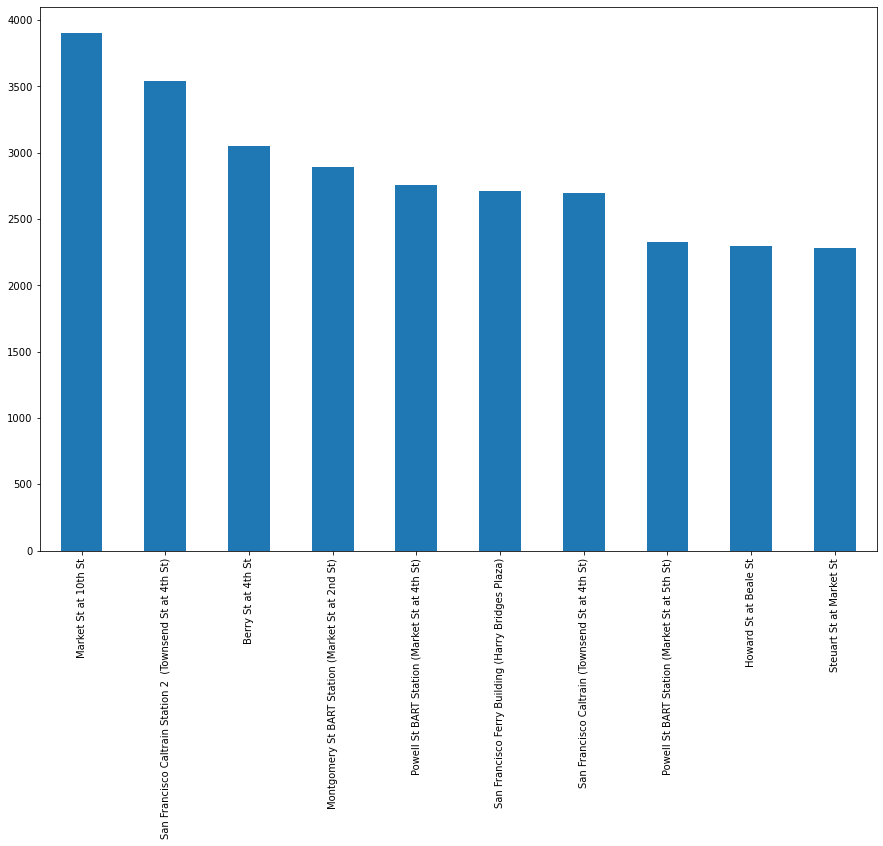

In [53]:
# the most 10 start station
plt.figure(figsize = [15, 10])
df1.start_station_name.value_counts(sort=True, ascending=False)[:10].plot(kind='bar');

In [26]:
# Create a function to calculate the number of trips, days and hours
base_color = sb.color_palette('colorblind')[0]
def Distribution1(df1, d1, t1, normalize=True):
    graph = sb.catplot(data=df1, x=d1, kind='count', color = base_color , aspect = 2)
    graph.set_axis_labels(t1, 'Number of Bike Trips')
    graph.fig.suptitle(f'{t1} Trip by Ford GoBike System', y=1.05, fontsize=16, fontweight='bold');
    graph.set_xticklabels(rotation=75);

## The days with the highest number of trips by Ford GoBike System

> The highest number of trips is on Thursday, when the number of trips reached more than 35,000 trips by Ford GoBike System.

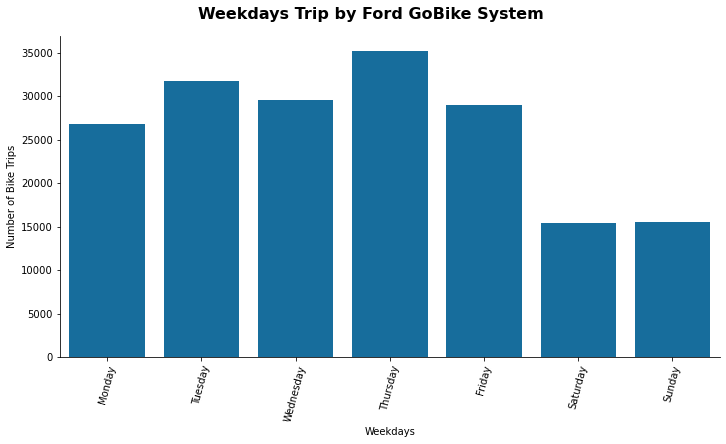

In [51]:
# function call
Distribution1(df1, 'start_day_ordered', 'Weekdays')

## Highest trips duration minutes for the number of trips

> The duration of the trip is between 4 to 15 minutes, so we conclude that the riders ride the bike in short distances.

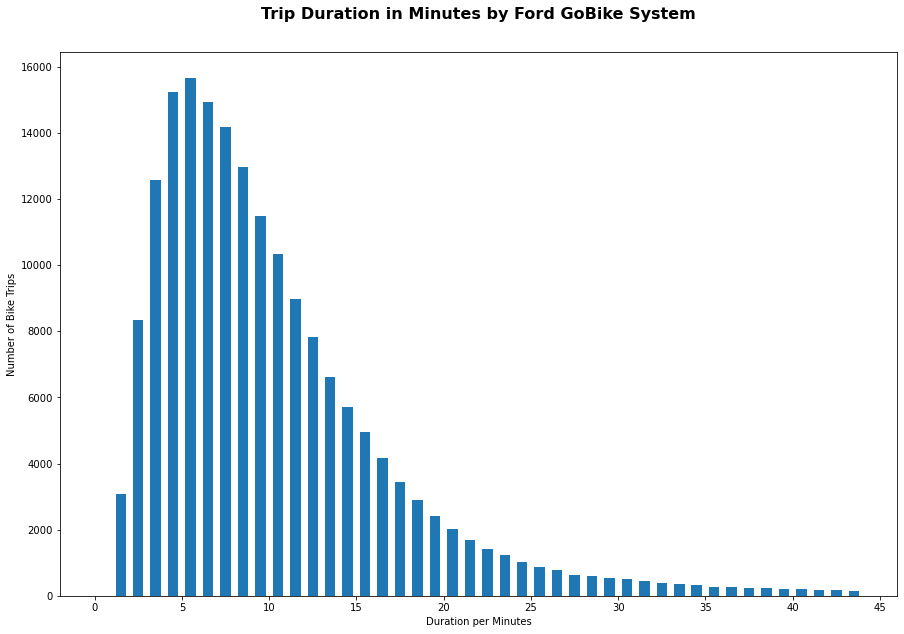

In [28]:
# The trip per minute by the bike
plt.figure(figsize = [15, 10])
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]
plt.hist(data = df1, x = 'duration_minutes', bins = bin_edges, rwidth = 0.6);
plt.title("Trip Duration in Minutes by Ford GoBike System", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration per Minutes')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');

## Highest average age used Ford GoBike System

> The highest number of trips was for young people from the age of 20 to 40, And the highest at the age of 30 to 35.

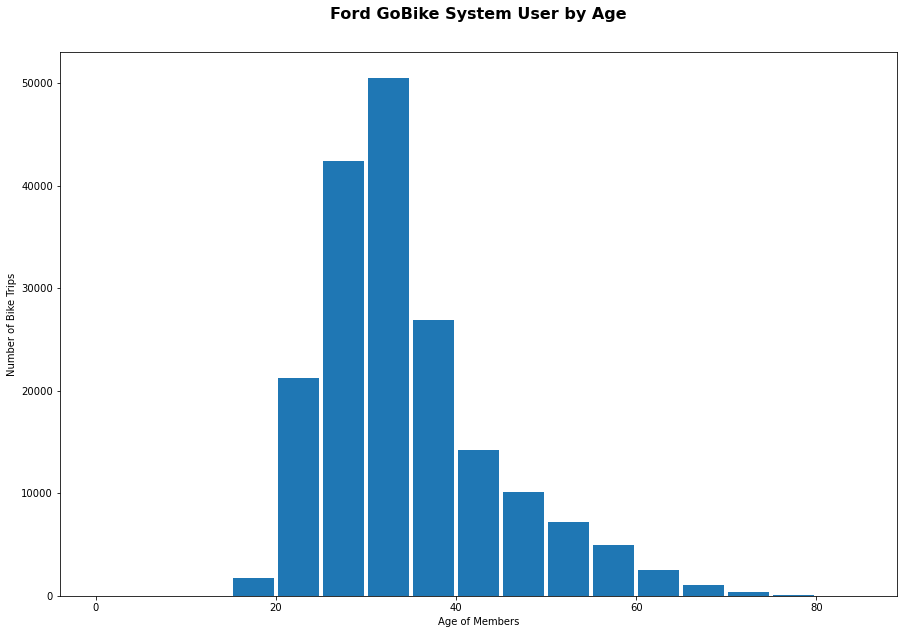

In [29]:
#The relationship between age and number of trips
plt.figure(figsize = [15, 10])
edges = np.arange(0, 90, 5)
plt.hist(data = df1, x = 'member_age', bins = edges, rwidth = 0.9);
plt.title("Ford GoBike System User by Age", y=1.05, fontsize=16, fontweight='bold',)
plt.xlabel('Age of Members')
plt.ylabel('Number of Bike Trips');

In [30]:
# Create a function to find the number of a variable
def Distribution2(df1, d2, t2, normalize=True):
    plt.figure(figsize = [15, 10])
    sb.countplot(data=df1, x=d2, color=base_color);
    plt.title(f'Distribution of {t2}', y=1.05, fontsize=16, fontweight='bold',)
    plt.xlabel(f'{t2}')
    plt.ylabel('Count');

## Distribution of User Type 

>The graph shows that the number of subscriber users exceeds 160000, while the number of customers is only 20000.

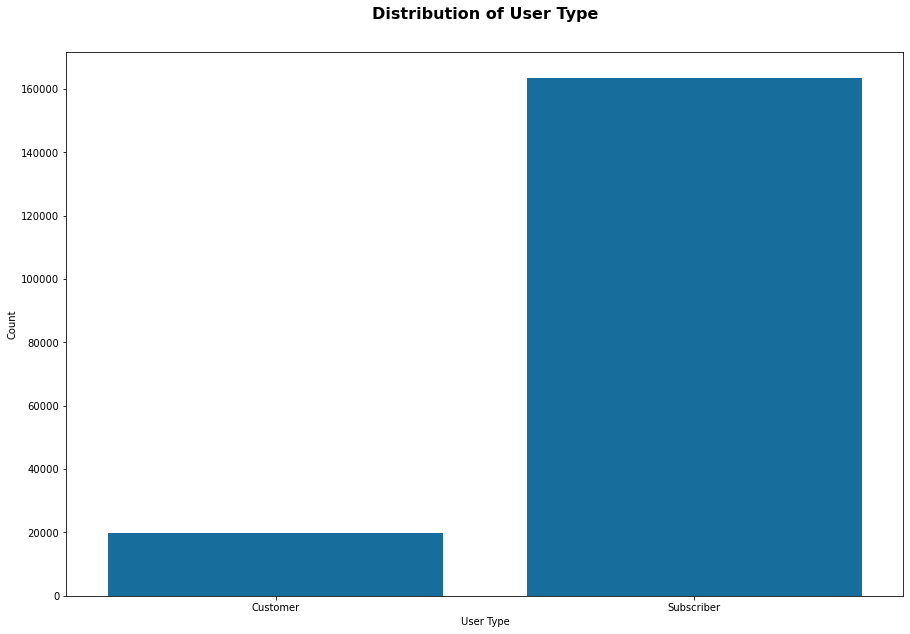

In [31]:
# function call
Distribution2(df1, 'user_type', 'User Type')

## Distribution of Gender

> The number of male users exceeds the number of female users by a very large percentage, as the number of male users has reached more than 130,000, while the number of female users is approximately 40,000.

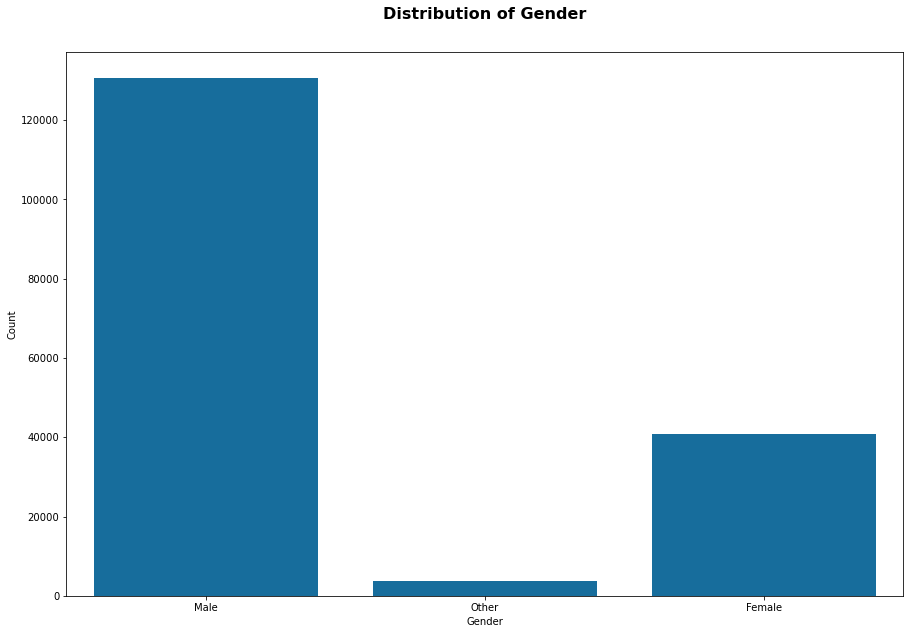

In [32]:
# function call
Distribution2(df1, 'member_gender', 'Gender')

## Distribution of trip duration between subscribers and customers

> Through violinplot we find that the trip duration for subscribers is much shorter than that of customer and we conclude that subscribers have more limited use for short distances while customers rent bikes for a longer period.

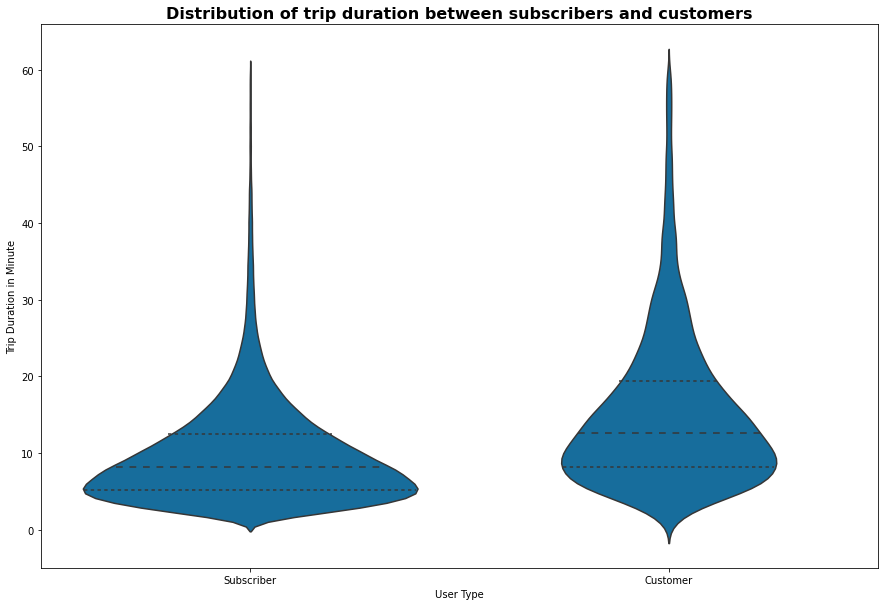

In [33]:
# Create a violin plot to compare the relationship between subscribers and customers through the duration of the trip
plt.figure(figsize = [15, 10])
sb.violinplot(data=df1.query('duration_minutes <= 60'), x='user_type', y='duration_minutes', color=base_color, inner='quartile');
plt.title('Distribution of trip duration between subscribers and customers', fontsize=16, fontweight='bold')
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

## Distribution trips on weekdays between subscribers and customers

> Through the graph, we find that the subscribers’ use of the bicycle is much more than the customers, and here we find that the subscribers’ use of the bicycle on normal days indicates that they use it to go to work as a means of transportation, while the clients use the bicycle indicates that they use it as a means of entertainment.

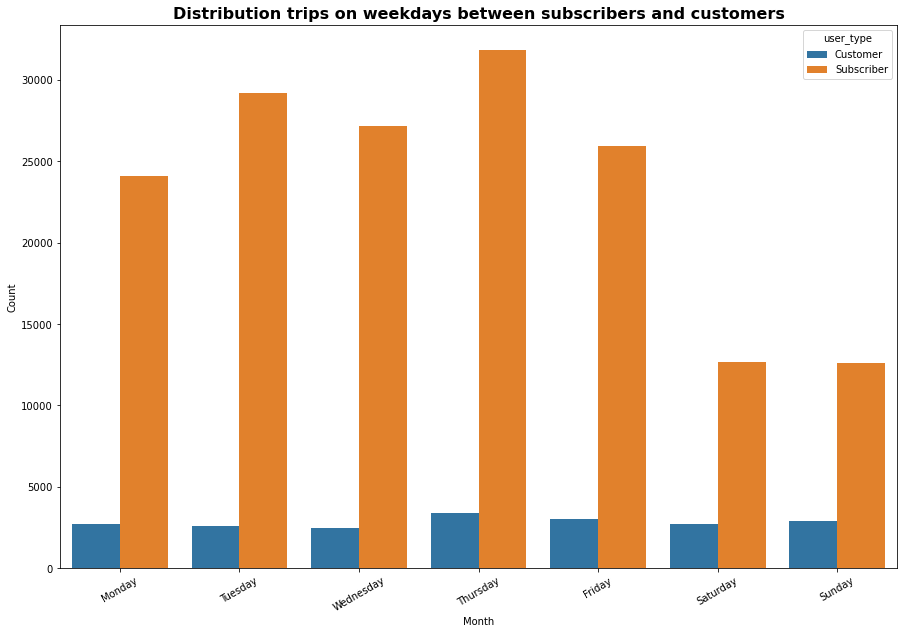

In [54]:
# Distribution trips on weekdays between subscribers and customers
plt.figure(figsize = [15, 10])
sb.countplot(data=df1, x='start_day_ordered', hue='user_type',);
plt.title('Distribution trips on weekdays between subscribers and customers', fontsize=16, fontweight='bold')
plt.xticks(rotation=30);
plt.xlabel('Month');
plt.ylabel('Count');

## Duration of  Bike Trips Each Weekday (Start Days-End Days)

> we find that Sundays and saturday are the most long days for a bike trip.
We find some differences at the start day from end day, so we find that the curve on Tuesday and Wednesday at the start day has increased in the number of trips from the end day, but it is a simple increase.

In [37]:
# Create a function to find the relationship between two variables
def Distribution3(df1, d3, t3, normalize=True):
    plt.subplots(figsize=(15,10))
    sb.pointplot(data=df1, x=d3 , y='duration_minutes', )
    plt.title(f'Duration of  Bike Trips Each Weekday - {t3}', fontsize = 16, weight = "bold")
    plt.ylabel('Duration Minutes', fontsize = 14, weight = "bold")
    plt.xlabel('Days', fontsize=14, weight = "bold"); 

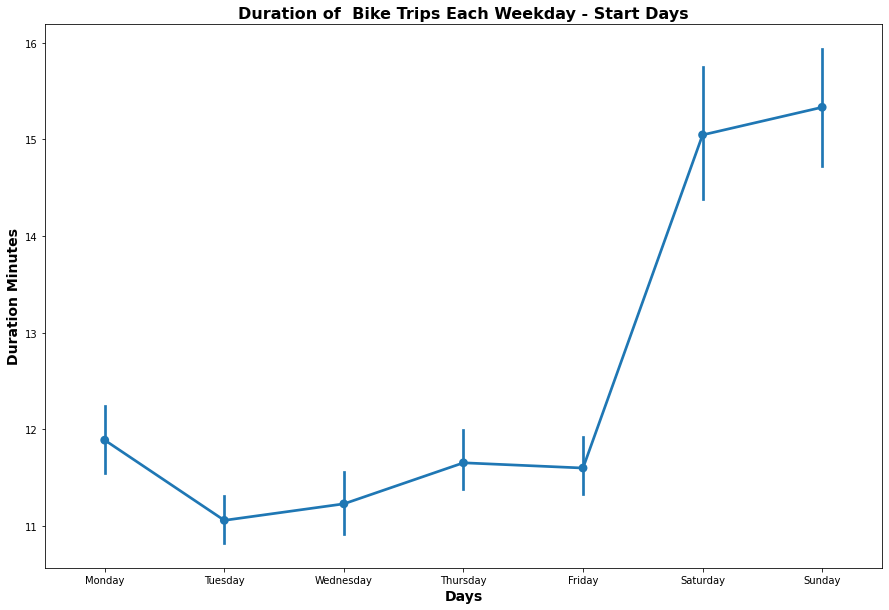

In [40]:
Distribution3(df1, 'start_day_ordered', 'Start Days')

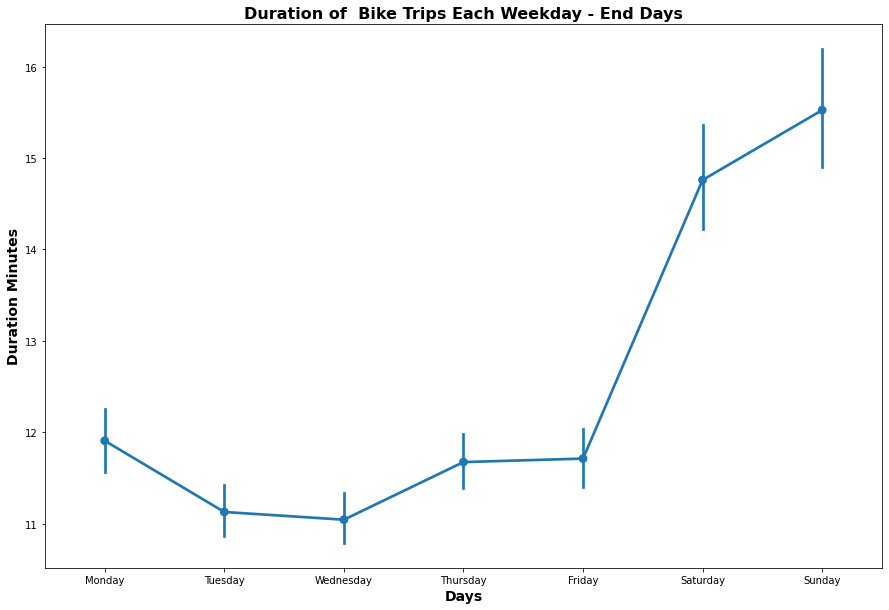

In [41]:
Distribution3(df1, 'end_day_ordered', 'End Days')

In [42]:
# Create a function to find the relationship between two variables
def Distribution4(df1, d4, b4, t4, normalize=True):
    plt.subplots(figsize=(15,10))
    ax = sb.histplot(data=df1, x=d4, hue=b4, kde=True,)
    plt.title(f'Most Common {t4} For Having Bike Trips', fontsize = 16, weight = "bold")
    plt.ylabel('Bike Trips')
    plt.xlabel(t4); 

## Most Common Hours For Having Bike Trips

> Through this multiple perception, we find that, as we previously knew, men use bicycles more than women, and also the length of the hourly trip was 8 to 10 and 16 to 18 hours.

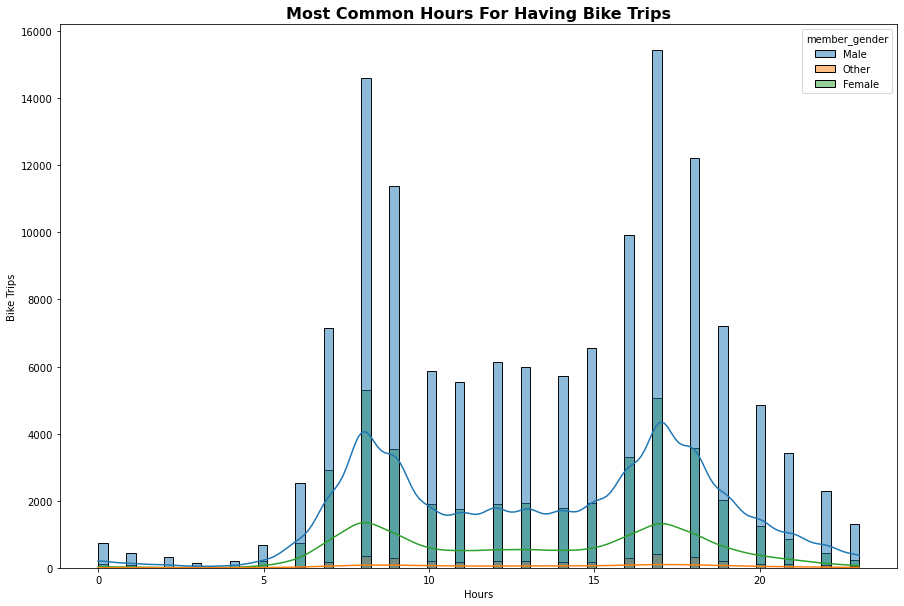

In [43]:
Distribution4(df1, 'start_time_hour', 'member_gender', 'Hours')

## Most Common Age For Having Bike Trips

> Through this multiple perception, we find that, as we previously knew, age has an impact on the duration of the trip, as well as gender.

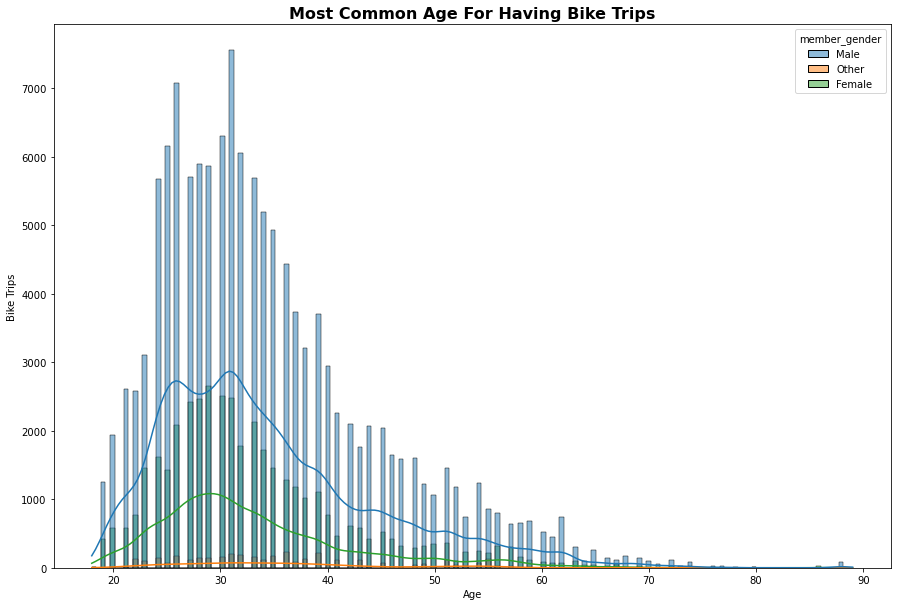

In [44]:
Distribution4(df1, 'member_age', 'member_gender', 'Age')

## Trip duration in each weekday according to user type

> In the short period of time there is almost no difference between subscribers and customers, while in the large period of time there is a difference between them as the customers are more than the subscribers.

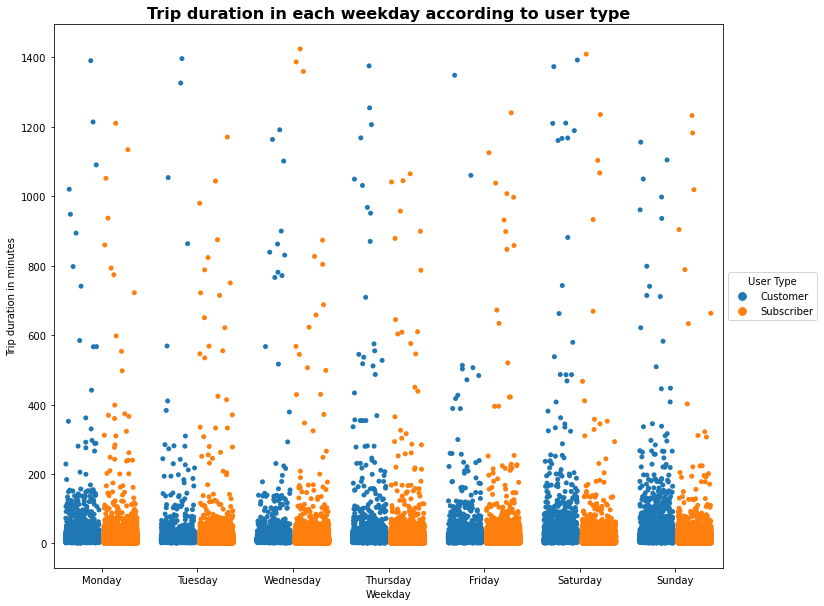

In [47]:
plt.figure(figsize = [12, 10])
sb.stripplot(data= df1, x= 'start_day_ordered', y= 'duration_minutes', hue= 'user_type', jitter= 0.35, dodge= True);
plt.legend(loc= 'center left', bbox_to_anchor= (1,0.5), title= 'User Type')
plt.title('Trip duration in each weekday according to user type', fontsize = 16, weight = "bold")
plt.xlabel('Weekday')
plt.ylabel('Trip duration in minutes');

## Bike sharing system per user type and gender During the weekdays

> For subscribers, they use the system during weekdays regularly at certain times, which indicates, as I mentioned earlier, that they use it as a means of transportation, while customers use it on holidays.

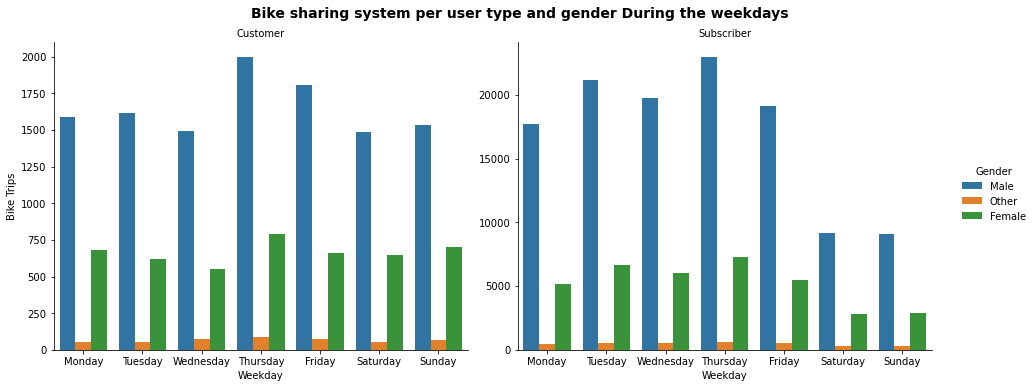

In [48]:
# bike sharing system per user type and gender During the weekdays
g = sb.catplot(data=df1, x='start_day_ordered', col="user_type", hue='member_gender', kind='count', sharey = False, aspect=1.3)
g.set_axis_labels("Weekday", "Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Bike sharing system per user type and gender During the weekdays', y=1.03, fontsize=14, fontweight='semibold');


## Hourly usage during the weekday for customers and subscribers

> Subscribers: They bike regularly throughout the week and most bike rides start around 8-9 am. and 5-6 p.m. and culminate on Thursdays around 8 am and 5 pm.

> customers: They bike on weekdays and most bike rides start around 8-9 a.m. and 5-6 am and peak on Thursdays around 5 pm.

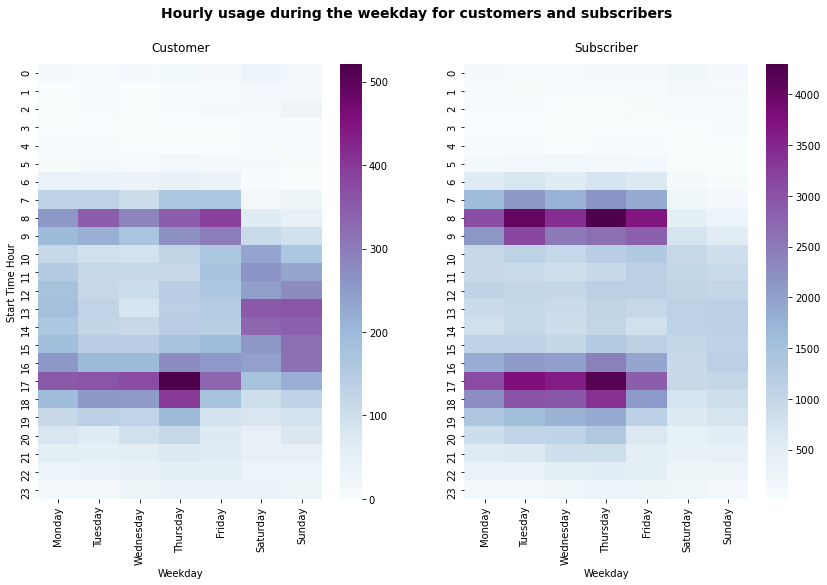

In [49]:
# create heatmap for customers and heatmap for subscribers 
df1['start_day_ordered'] = pd.Categorical(df1['start_day_ordered'], ordered=True)
plt.figure(figsize=(14,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')
#customers
plt.subplot(1, 2, 1)
df_customer = df1.query('user_type == "Customer"').groupby(["start_time_hour", "start_day_ordered"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_day_ordered", "bike_id")
sb.heatmap(df_customer, cmap="BuPu")
plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')
#subscribers
plt.subplot(1, 2, 2)
df_subscriber = df1.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_day_ordered"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_day_ordered", "bike_id")
sb.heatmap(df_subscriber, cmap="BuPu")
plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday');
plt.ylabel('');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
! jupyter nbconvert slide_deck_Ford_Gobike_System.ipynb --to slides --post serve --no-input --no-prompt